In [1]:
import copy
import numpy as np
import os
import matplotlib.pyplot as plt
import pprint

from copy import deepcopy
from evo.core import metrics, sync
from evo.core.trajectory import PosePath3D
from evo.tools import plot

from tum_tools import *
from tum_definitions import *

%load_ext autoreload
%autoreload 2

%matplotlib inline
%matplotlib widget


In [10]:
!evo_traj tum ekf_pose_with_covariance.tum --ref in_pose_with_covariance.tum -p

--------------------------------------------------------------------------------
name:	ekf_pose_with_covariance
infos:	29244 poses, 1595.140m path length, 310.452s duration
--------------------------------------------------------------------------------
name:	in_pose_with_covariance
infos:	30823 poses, 1580.029m path length, 310.329s duration
/home/julian/.local/lib/python3.8/site-packages/evo/tools/plot.py:191: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [2]:
# Load previously computed data
import pickle

data_root = ""

gt_file = os.path.join("data/full", "gt_poses.pkl")
traj_file = os.path.join("data/full2", "kiss_trajectories_corrected_corr.pkl")

with open(gt_file, 'rb') as f:
    gt_dict = pickle.load(f)
    
with open(traj_file, 'rb') as f:
    traj_dict = pickle.load(f)
    
    

In [27]:
# Extract relevant data
current_key = "mdv3_full_no_merge"
traj_ref = gt_dict['trajectory']
traj_est = traj_dict[current_key][2]



In [60]:
traj_ref.timestamps

array([ 9691.61308175,  9691.63337451,  9691.63457611, ...,
       10001.94278255, 10001.95836409, 10001.96190162])

In [61]:
len(traj_est.timestamps)

2967

In [28]:
# Align data
max_diff = 1

traj_ref, traj_est = sync.associate_trajectories(traj_ref, traj_est, max_diff)


In [29]:
# Compute Metrics
ape_metric = metrics.APE()
ape_metric.process_data((traj_ref, traj_est))
ape_stats = ape_metric.get_all_statistics()
pprint.pprint(ape_stats)

{'max': 14.716085744070018,
 'mean': 4.547961995442905,
 'median': 3.9088621381235202,
 'min': 0.0,
 'rmse': 5.429155730016506,
 'sse': 361814.60957296466,
 'std': 2.9650925160571378}


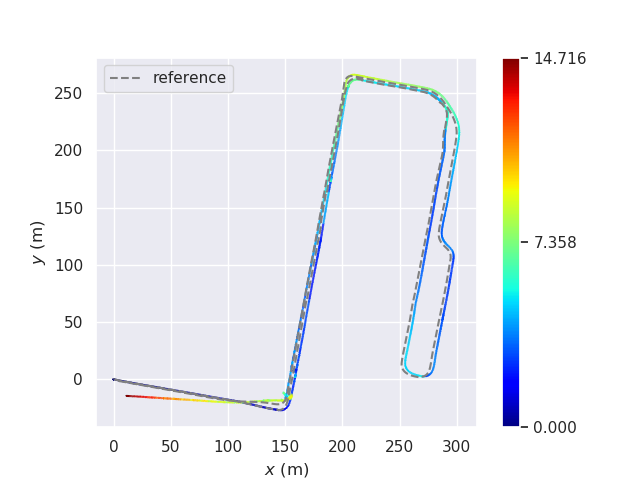

In [30]:
plot_ape_errors(traj_ref, traj_est, ape_metric, ape_stats)
plt.savefig(f"figures/ape_{current_key}.pdf", format="pdf", bbox_inches="tight")

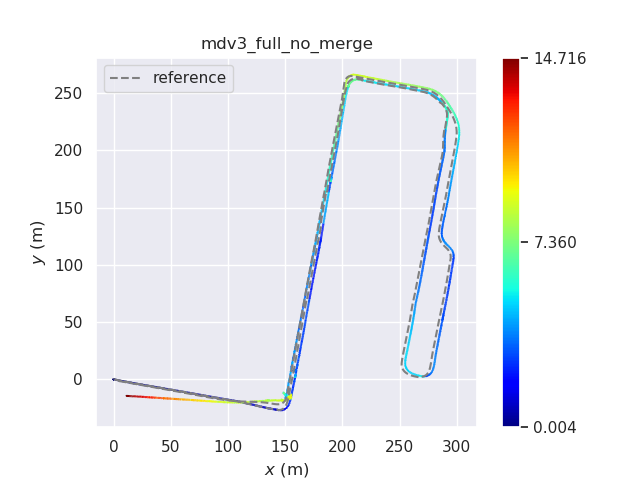

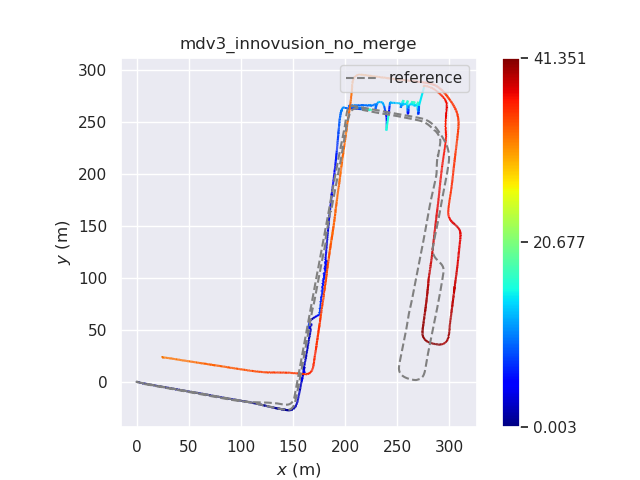

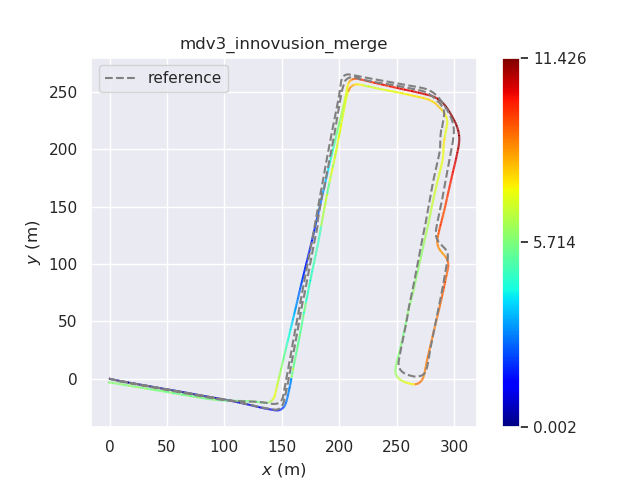

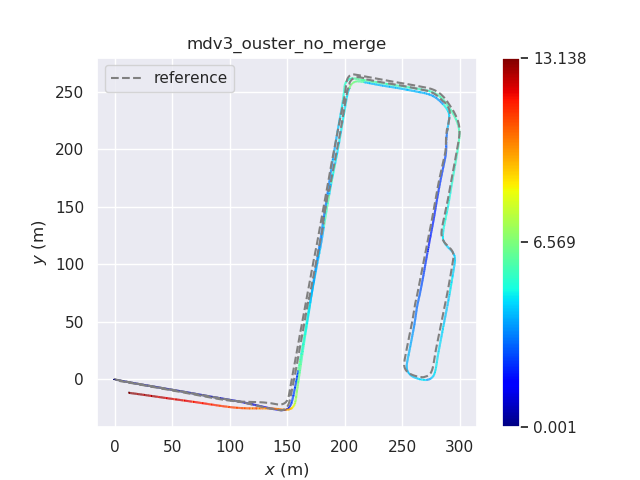

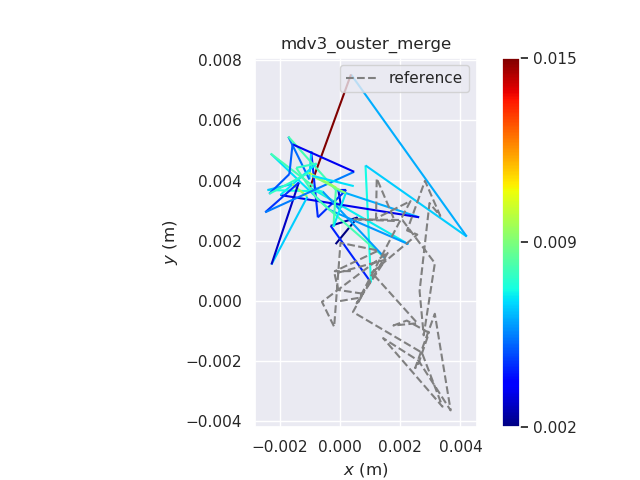

Info: Did not found a recorded trajectory for mdv3_ouster_inno_front_no_merge


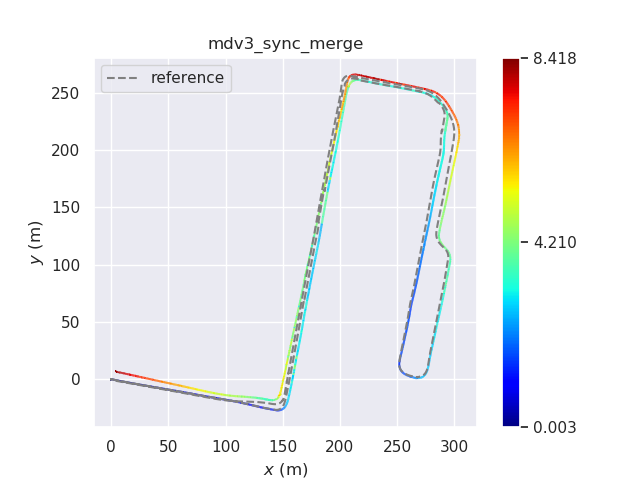

In [3]:
# PLOT THE FULL SET

max_diff = 0.01
results = {}

for recording in Mdv3Dataset:
    if traj_dict.get(recording.value) is None:
        print(f"Info: Did not found a recorded trajectory for {recording.value}")
        continue

    traj_ref = gt_dict['trajectory']
    traj_est = traj_dict[recording.value][2]
    traj_ref, traj_est = sync.associate_trajectories(traj_ref, traj_est, max_diff)
    
    ape_metric = metrics.APE()
    ape_metric.process_data((traj_ref, traj_est))
    ape_stats = ape_metric.get_all_statistics()
    plot_ape_errors(traj_ref, traj_est, ape_metric, ape_stats, title=recording.value)
    plt.savefig(f"figures/ape_{recording.value}.pdf", format="pdf", bbox_inches="tight")
    results[recording.value] = ape_stats
    

In [4]:
for recording, stats in results.items():
    print(f"Statistics for {recording}")
    pprint.pprint(stats)

Statistics for mdv3_full_no_merge
{'max': 14.716085744070018,
 'mean': 4.506900416885009,
 'median': 3.87098378180859,
 'min': 0.003696298747702541,
 'rmse': 5.398696672561785,
 'sse': 312386.0323206496,
 'std': 2.972166616226523}
Statistics for mdv3_innovusion_no_merge
{'max': 41.3508157483482,
 'mean': 25.522351988918818,
 'median': 34.14024029776444,
 'min': 0.0029608619885260292,
 'rmse': 29.811210823348667,
 'sse': 4796358.645200098,
 'std': 15.40512381345481}
Statistics for mdv3_innovusion_merge
{'max': 11.42618944314952,
 'mean': 6.088737091709737,
 'median': 6.381323585656111,
 'min': 0.0017684080683035878,
 'rmse': 6.77602618209916,
 'sse': 122729.54088317865,
 'std': 2.973518361895783}
Statistics for mdv3_ouster_no_merge
{'max': 13.137569978893858,
 'mean': 4.435863209256107,
 'median': 4.219115765205464,
 'min': 0.001298372487359463,
 'rmse': 5.249361998809472,
 'sse': 146624.41922037382,
 'std': 2.8069412147946906}
Statistics for mdv3_ouster_merge
{'max': 0.0148113310365155

In [68]:
results

{'mdv3_full_no_merge': {'rmse': 5.398696672561785,
  'mean': 4.506900416885009,
  'median': 3.87098378180859,
  'std': 2.972166616226523,
  'min': 0.003696298747702541,
  'max': 14.716085744070018,
  'sse': 312386.0323206496},
 'mdv3_innovusion_no_merge': {'rmse': 29.811210823348667,
  'mean': 25.522351988918818,
  'median': 34.14024029776444,
  'std': 15.40512381345481,
  'min': 0.0029608619885260292,
  'max': 41.3508157483482,
  'sse': 4796358.645200098},
 'mdv3_innovusion_merge': {'rmse': 6.77602618209916,
  'mean': 6.088737091709737,
  'median': 6.381323585656111,
  'std': 2.973518361895783,
  'min': 0.0017684080683035878,
  'max': 11.42618944314952,
  'sse': 122729.54088317865},
 'mdv3_ouster_no_merge': {'rmse': 5.249361998809472,
  'mean': 4.435863209256107,
  'median': 4.219115765205464,
  'std': 2.8069412147946906,
  'min': 0.001298372487359463,
  'max': 13.137569978893858,
  'sse': 146624.41922037382},
 'mdv3_ouster_merge': {'rmse': 6.7213700099841205,
  'mean': 6.119199357796

In [69]:
import csv
import itertools

fields = [ 'Type', 'max', 'mean', 'median', 'min', 'rmse', 'sse', 'std']


with open("test_output.csv", "w") as f:
    w = csv.DictWriter(f, fields)
    w.writeheader()
    for k in results:
        w.writerow({field: results[k].get(field) or k for field in fields})

In [ ]:
plot_trajectories_from_poses(traj_ref, traj_est)